In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

2023-04-05 09:41:44.605944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ml_scores=pd.DataFrame({'Dataset':['DS1','DS1','DS1','DS1','DS2','DS2','DS2','DS2','DS3','DS3','DS3','DS3'], 'Method': ['SVC','Random Forest','XGBC','Neural Networks','SVC','Random Forest','XGBC','Neural Networks','SVC','Random Forest','XGBC','Neural Networks'], 'Score': np.zeros(12)})

In [ ]:
ml_scores.head(12)

# Primer dataset

In [35]:
df = pd.read_csv('data/space_etl2.csv',skipinitialspace=True)

In [36]:
y = df.Transported
X = df.drop(['Transported','Cabin'],axis=1)


In [5]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Support Vector Machine

In [6]:
svc = SVC(gamma='auto',random_state=1,kernel='rbf')

In [7]:
svc.fit(X_train,y_train)

SVC(gamma='auto', random_state=1)

In [8]:
predicted = svc.predict(X_test)

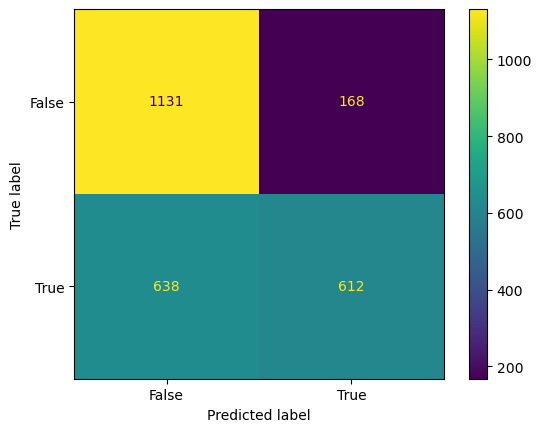

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [9]:
accuracy_score(y_test, predicted)

0.6837975676735975

In [ ]:
ml_scores['Score'].iloc[0] = accuracy_score(y_test, predicted)

## RandomForestClassifier

In [6]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth=15, random_state=1)

In [7]:
rfc.fit(X_train, y_train)
X_predicted = rfc.predict(X_test)

In [8]:
accuracy_score(y_test,X_predicted)

0.7987446057277363

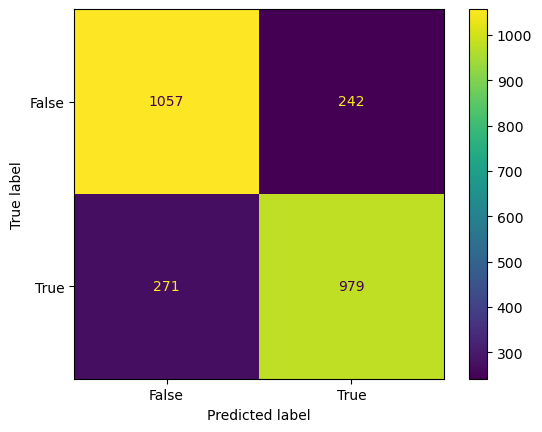

In [14]:
confusion_matrix = metrics.confusion_matrix(y_test, X_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [ ]:
ml_scores['Score'].iloc[1] = accuracy_score(y_test,X_predicted)

### RandomForestClassifier con GridCV

In [8]:
#parameters = {'n_estimators':[50,100,150,200,250], 'max_depth':[5,6,7,8,9,10,11,12,13,14,15],'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}
parameters= {'n_estimators':[50,100,150,200,250], 'max_depth':[8,9,10,11,12,13,14,15]}
rfc = RandomForestClassifier(random_state=1)
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'max_depth': 15, 'n_estimators': 100}

## XGBClassifier

In [38]:
xbgc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=1,max_depth=8,n_estimators=50)

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [39]:
xbgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [40]:
xbgc_predicted = xbgc.predict(X_test)

In [41]:
accuracy_score(y_test, xbgc_predicted)

0.8003138485680659

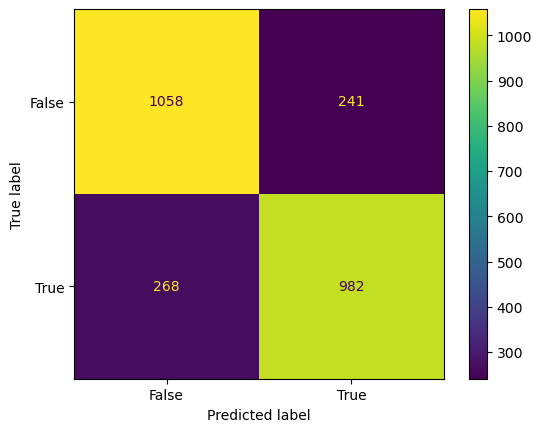

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, xbgc_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [ ]:
ml_scores['Score'].iloc[2] = accuracy_score(y_test, xbgc_predicted)

### XGBClassifier con GridCV

In [13]:
parameters = {'max_depth':[8,9,10,11,12,13,14,15],'n_estimators':[50,100,150,200,250],}
xbgc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=1)
clf = GridSearchCV(xbgc, parameters)
clf.fit(X_train,y_train)
clf.best_params_

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib

{'max_depth': 8, 'n_estimators': 50}

## Naive Bayes Classifier

In [21]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7559827383287564

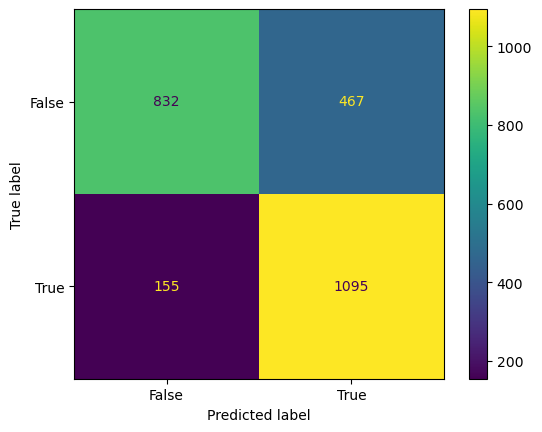

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

## Redes de Neuronas

In [10]:
df = pd.read_csv('data/space_etl2.csv',skipinitialspace=True)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [11]:
y = df.Transported
X = df.drop(['Transported','Cabin'],axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
input_shape= [X_train.shape[1]]

In [14]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

2023-04-05 09:49:46.170745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 09:49:46.172570: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
12/12 [==============================] - 2s 75ms/step - loss: 0.5966 - binary_accuracy: 0.7139 - val_loss: 0.5627 - val_binary_accuracy: 0.6865
Epoch 2/200
12/12 [==============================] - 0s 41ms/step - loss: 0.5140 - binary_accuracy: 0.7590 - val_loss: 0.5506 - val_binary_accuracy: 0.7018
Epoch 3/200
12/12 [==============================] - 0s 42ms/step - loss: 0.4710 - binary_accuracy: 0.7670 - val_loss: 0.5368 - val_binary_accuracy: 0.7207
Epoch 4/200
12/12 [==============================] - 0s 39ms/step - loss: 0.4620 - binary_accuracy: 0.7761 - val_loss: 0.5282 - val_binary_accuracy: 0.7583
Epoch 5/200
12/12 [==============================] - 0s 34ms/step - loss: 0.4442 - binary_accuracy: 0.7770 - val_loss: 0.5220 - val_binary_accuracy: 0.7544
Epoch 6/200
12/12 [==============================] - 0s 37ms/step - loss: 0.4402 - binary_accuracy: 0.7882 - val_loss: 0.5115 - val_binary_accuracy: 0.7815
Epoch 7/200
12/12 [==============================] - 0s 36ms/ste

<AxesSubplot: title={'center': 'Accuracy'}>

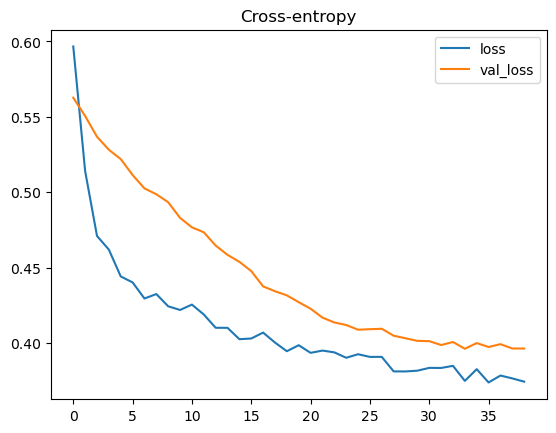

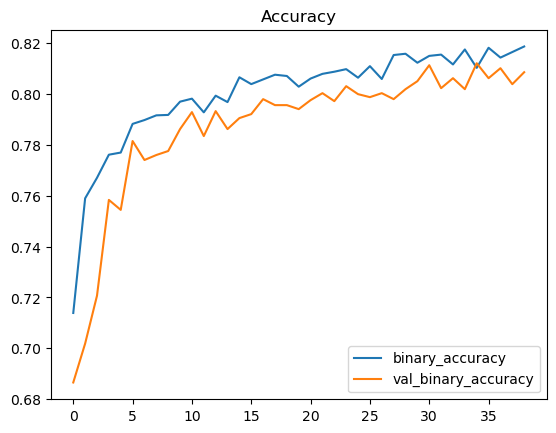

In [17]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
ml_scores['Score'].iloc[3] = history_df['val_binary_accuracy'].iloc[-1]

# Segundo Dataset

In [18]:
df2 = pd.read_csv('data/space_etl3.csv',skipinitialspace=True)
df2['VIP'] = df2['VIP'].astype(int)
df2['CryoSleep'] = df2['CryoSleep'].astype(int)

In [19]:
y = df2.Transported
X = df2.drop(['Transported','Cabin'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Support Vector Machines

In [20]:
svc = SVC(gamma='auto',random_state=1,kernel='rbf')
svc.fit(X_train,y_train)
predicted = svc.predict(X_test)
#ml_scores['Score'].iloc[4] = accuracy_score(y_test, predicted)

In [21]:
accuracy_score(y_test, predicted)

0.6660098522167488

## RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators = 150,max_depth=10, random_state=1)
rfc.fit(X_train, y_train)
X_predicted = rfc.predict(X_test)
#ml_scores['Score'].iloc[5] = accuracy_score(y_test,X_predicted)

In [23]:
accuracy_score(y_test,X_predicted)

0.7990147783251231

## XGBClassifier

In [24]:
xbgc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=1,max_depth=10)
xbgc.fit(X_train,y_train)
xbgc_predicted = xbgc.predict(X_test)
#ml_scores['Score'].iloc[6] = accuracy_score(y_test, xbgc_predicted)

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [25]:
accuracy_score(y_test, xbgc_predicted)

0.7940886699507389

## Neural Networks

In [26]:
input_shape= [X_train.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
10/10 [==============================] - 2s 72ms/step - loss: 0.6442 - binary_accuracy: 0.6878 - val_loss: 0.5760 - val_binary_accuracy: 0.7286
Epoch 2/200
10/10 [==============================] - 0s 39ms/step - loss: 0.4867 - binary_accuracy: 0.7729 - val_loss: 0.5478 - val_binary_accuracy: 0.7808
Epoch 3/200
10/10 [==============================] - 0s 34ms/step - loss: 0.4654 - binary_accuracy: 0.7780 - val_loss: 0.5410 - val_binary_accuracy: 0.7685
Epoch 4/200
10/10 [==============================] - 0s 42ms/step - loss: 0.4464 - binary_accuracy: 0.7824 - val_loss: 0.5371 - val_binary_accuracy: 0.7867
Epoch 5/200
10/10 [==============================] - 1s 53ms/step - loss: 0.4393 - binary_accuracy: 0.7854 - val_loss: 0.5341 - val_binary_accuracy: 0.7847
Epoch 6/200
10/10 [==============================] - 0s 42ms/step - loss: 0.4393 - binary_accuracy: 0.7852 - val_loss: 0.5260 - val_binary_accuracy: 0.7852
Epoch 7/200
10/10 [==============================] - 0s 42ms/ste

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
ml_scores['Score'].iloc[7] = history_df['val_binary_accuracy'].iloc[-1]

# Tercer Dataset

In [27]:
df3 = pd.read_csv('data/space_etl4.csv',skipinitialspace=True)
df3['VIP'] = df3['VIP'].astype(int)
df3['CryoSleep'] = df3['CryoSleep'].astype(int)

In [28]:
y = df3.Transported
X = df3.drop(['Transported','Cabin'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators = 150,max_depth=10, random_state=1)
rfc.fit(X_train, y_train)
X_predicted = rfc.predict(X_test)
#ml_scores['Score'].iloc[8] = accuracy_score(y_test,X_predicted)
accuracy_score(y_test,X_predicted)

0.8073754413495489

## Support Vector Machines

In [31]:
svc = SVC(gamma='auto',random_state=1,kernel='rbf')
svc.fit(X_train,y_train)
predicted = svc.predict(X_test)
#ml_scores['Score'].iloc[9] = accuracy_score(y_test, predicted)
accuracy_score(y_test, predicted)

0.685366810513927

## XGBClassifier

In [32]:
xbgc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=1,max_depth=10)
xbgc.fit(X_train,y_train)
xbgc_predicted = xbgc.predict(X_test)
#ml_scores['Score'].iloc[10] = accuracy_score(y_test, xbgc_predicted)
accuracy_score(y_test, xbgc_predicted)

/home/enrique.jimenez/miniconda3/envs/curso_ciencia_de_datos/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.7959984307571597

## Neural Networks

In [33]:
input_shape= [X_train.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
12/12 [==============================] - 2s 72ms/step - loss: 0.6358 - binary_accuracy: 0.7001 - val_loss: 0.5627 - val_binary_accuracy: 0.6971
Epoch 2/200
12/12 [==============================] - 1s 47ms/step - loss: 0.5006 - binary_accuracy: 0.7563 - val_loss: 0.5380 - val_binary_accuracy: 0.7356
Epoch 3/200
12/12 [==============================] - 1s 56ms/step - loss: 0.4608 - binary_accuracy: 0.7739 - val_loss: 0.5380 - val_binary_accuracy: 0.7548
Epoch 4/200
12/12 [==============================] - 0s 36ms/step - loss: 0.4559 - binary_accuracy: 0.7754 - val_loss: 0.5320 - val_binary_accuracy: 0.7489
Epoch 5/200
12/12 [==============================] - 0s 39ms/step - loss: 0.4484 - binary_accuracy: 0.7812 - val_loss: 0.5261 - val_binary_accuracy: 0.7783
Epoch 6/200
12/12 [==============================] - 1s 46ms/step - loss: 0.4496 - binary_accuracy: 0.7823 - val_loss: 0.5218 - val_binary_accuracy: 0.7564
Epoch 7/200
12/12 [==============================] - 1s 44ms/ste

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
ml_scores['Score'].iloc[11] = history_df['val_binary_accuracy'].iloc[-1]

In [ ]:
ml_scores.head()

# Reporte

| Dataset | Método de ML | Accuracy |
| --- | --- | --- |
| Dataset1 | SVC | .683 |
| Dataset1 | RandomForest | .798 |
| Dataset1 | XGBClassifier | .800 |
| Dataset1 | Neural Networks | .808 |
| Dataset2 | SVC | .666 |
| Dataset2 | RandomForest | .799 |
| Dataset2 | XGBClassifier | .794 |
| Dataset2 | Neural Networks | .810 |
| Dataset3 | SVC | .685 |
| Dataset3 | RandomForest | .807 |
| Dataset3 | XGBClassifier | .795 |
| Dataset3 | Neural Networks | .810 |

## Descripción

Se han usado tres datasets creados en la fase de la ETL. Estos datasets tienen en común las siguientes características:

  - Se ha eliminado las columnas de *PassengerID* y *Name*
  - Se ha eliminado los NaN de la columna *Cabin*
  - Se ha dividido la columan *Cabin* en las columnas *Deck*, *Num* y *Side*
  - Las columnas *VIP* y *CryoSleep* se han convertido de object a bool
  - Se han las columnas de *Deck*, *Num*, *Side*, *Destination* y *HomePlanet* a discretas 

El primer dataset tiene las siguientes características:
  - Se ha usado el método KNNImputer para imputar los NaN de las columnas de los amenities
  - Se ha imputado los NaN de la columna de *Age* siguiendo la media de esta
  - Se ha imputado los NaN de *VIP* y *CryoSleep* siguiendo usando el atributo más frecuente

El segundo dataset tiene las siguientes características:
  - Se ha eliminado los NaN presentes en todas las columnas

El tercer dataset tiene las siguientes características:
  - Se ha imputado los NaN de las columnas de los amenities siguiendo la mediana de estas
  - Se ha imputado los NaN de la columan de *Age* siguiendo la media de esta
  - Se ha imputado los NaN de *VIP* y *CryoSleep* siguiendo usando el atributo más frecuente
  
Se han usado los métodos de SVC, RandomForest, XGBClassifier y Neural Networks de ML. Para el primer dataset se ha usado también el método de NaiveBayes. No se ha usado los métodos de regresiones debido a la poca correlación de los datos.

## Guardado del modelo y pruebas

In [34]:
import pickle

In [42]:
pickle.dump(xbgc, open('modelXGBC.pkl', 'wb'))

In [43]:
pickled_model = pickle.load(open('modelXGBC.pkl', 'rb'))
predicted = pickled_model.predict(X_test)
accuracy_score(y_test, predicted) #mismo resultado

0.8003138485680659